# EXERCISES OF https://qiskit.org/textbook/

In [1]:
#imports
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit import QuantumRegister, QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.extensions import Initialize
from qiskit.quantum_info import Operator
from math import sqrt, pi
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  #para ignorar os aviso devido as diferenças de versoes do qiskit

    

C:\Users\moham\AppData\Local\Temp\ipykernel_20392\3699305872.py:4: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import Initialize


# Representing Qubit States

Q. Use `plot_bloch_sphere_spherical()` to plot a qubit in the states:

- $|0\rangle$: 
- $|1\rangle$: 
- $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$: 
- $\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$: 
- $\tfrac{1}{\sqrt{2}}(i|0\rangle + |1\rangle)$: 

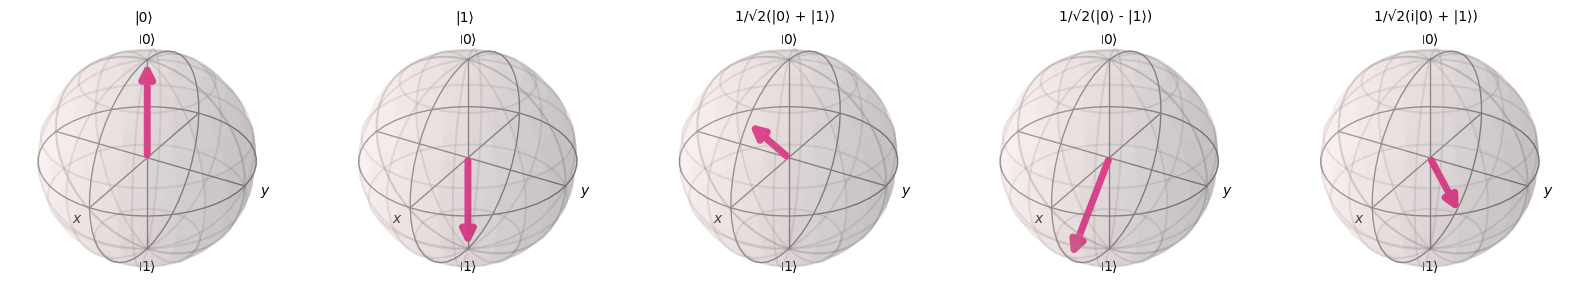

In [2]:

# define-se os estados num dicionario por exemplo
states = {
    "|0⟩": [0, 0, 1],
    "|1⟩": [0, 0, -1],
    "1/√2(|0⟩ + |1⟩)": [1, 0, 1]/np.sqrt(2),
    "1/√2(|0⟩ - |1⟩)": [1, 0, -1]/np.sqrt(2),
    "1/√2(i|0⟩ + |1⟩)": [1, 1, 0]/np.sqrt(2)
}
# criamos uma figura para as representações
fig = plt.figure(figsize=(20, 4))

# e num ciclo for plotamos os estados
for i, (name, state) in enumerate(states.items()):
    ax = fig.add_subplot(1, len(states), i + 1, projection='3d')
    plot_bloch_vector(state, ax=ax, title=name)

plt.show()


# Single Qubit Gates


1. Verify that |+⟩ and |−⟩ are in fact eigenstates of the X-gate, where

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

2. What eigenvalues of the X-gate do they have?

3. Why would we not see these eigenvalues appear on the Bloch sphere?

4. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

5. Write the H-gate as the outer products of vectors |0⟩, |1⟩, |+⟩ and |−⟩

6. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate

7. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase)


In [3]:
# 1
qc1 = QuantumCircuit(1)
qc = QuantumCircuit(1)
#inicia-se o cubit no estado |1>
qc.x(0)

# aplica se o gate hadamard  para criar o estado |+> e |-> respectivamente

qc1.h(0)
qc.h(0)
# aplica-se o gate x  em ambos
qc1.x(0)
qc.x(0)

# verificamos o resultado
simulator1 = Aer.get_backend('statevector_simulator')
simulator = Aer.get_backend('statevector_simulator')
job1 = execute(qc1, simulator)
job = execute(qc, simulator)
result1 = job1.result()
result = job.result()
statevector1 = result1.get_statevector()
statevector = result.get_statevector()
print(statevector1)
print(statevector)
qc.draw()
qc1.draw()


Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([-0.70710678+8.65956056e-17j,  0.70710678-8.65956056e-17j],
            dims=(2,))


┌───┐┌───┐
q: ┤ H ├┤ X ├
   └───┘└───┘

### 2
os valores proprios do gate X sao +1 e -1 correspondentes aos vetores proprios |+> e |-> respectivamente
e portanto a aplicação do gate x ao extado |+> resultaria 1|+> e o mesmo para o estado |-> = -1|->,
resultados semelhantes ao ex. anterior

### 3 
não veriamos esses valores proprios aparecerem na esfera de Bloch porque a esfera de Bloch é usada
para representar os estados quânticos e não os resultados das medições possiveis que sao os valores proórios.


### 4
Os estados proprios do gate Y são os estados |i⟩ e |-i⟩, onde:

$ |i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$

$ |-i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$

Para o estado |i⟩, temos θ = π/2 e φ = π/2, então as coordenadas na esfera de Bloch são (0, 1, 0)

Já para o estado |-i>, temos θ = π/2 e φ = 3π/2, (0, -1, 0)

### 5
O gate Hadamard pode ser expresso pelo produto tensorial dos vetores $ |0\rangle,|1\rangle,|+\rangle e |-\rangle$ :

$H = |+\rangle \langle0| + |-\rangle \langle1| $

In [4]:
qc = QuantumCircuit(2)

# podemos usar a sequencia de gates: HZH ao primeiro qubit
qc.h(0)
qc.z(0)
qc.h(0)

# e o gate X ao segundo qubit
qc.x(1)

# executamos 
result = execute(qc, Aer.get_backend('statevector_simulator')).result()
statevector = result.get_statevector()

print(" resultado:\n", statevector)

 resultado:
 Statevector([0.+0.000000e+00j, 0.+0.000000e+00j, 0.+6.123234e-17j,
             1.-6.123234e-17j],
            dims=(2, 2))


### 6
Podemos usar a sequencia de gates HZH para igualar um gate Y

In [5]:
qc = QuantumCircuit(2)

# usamos a sequencia de gates HZH  ao primeiro qubit
qc.h(0)
qc.z(0)

qc.h(0)

# e o gate Y ao segundo qubit
qc.y(1)

# verificamos
result = execute(qc, Aer.get_backend('statevector_simulator')).result()
statevector = result.get_statevector()

print("resultado:", statevector)


resultado: Statevector([ 0.000000e+00-0.j,  0.000000e+00-0.j, -6.123234e-17+0.j,
              6.123234e-17+1.j],
            dims=(2, 2))


# Qiskit 
1. Use Qiskit to display the probability of measuring a |0⟩ qubit in the states |+⟩ and |−⟩ (Hint: you might want to use `.get_counts()` and `plot_histogram()`).

2. Try to create a function that measures in the Y-basis

that is, we want a gate the performs the transformation:

$$ \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i \end{bmatrix} \rightarrow \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

$$ \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i \end{bmatrix} \rightarrow \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

3. Calculate the single qubit unitary (𝑈) created by the sequence of gates: 𝑈=𝑋𝑍𝐻. Use Qiskit's unitary simulator to check your results.

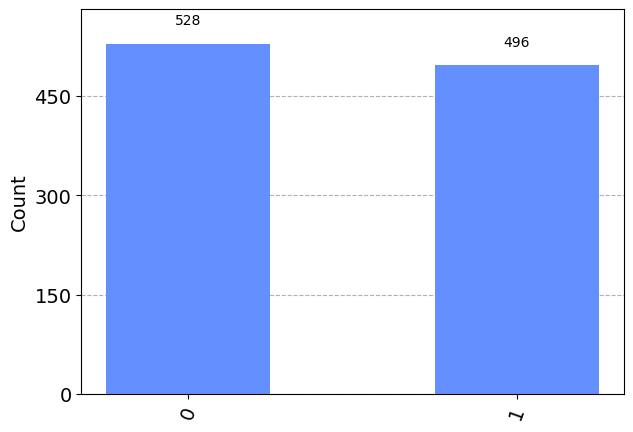

In [6]:
# 1
qc = QuantumCircuit(1)

# criamos o estado |+>
qc.h(0)

# medimos o qubit
qc.measure_all()

# executa-se e obtem-se as contagens
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
counts = result.get_counts()

# e fazemos o plot
plot_histogram(counts)
# como de esperar aprox. 50% das contagens para cada um


In [7]:
# 2
def measureY(qubit):
    qr = QuantumRegister(1, 'q')
    qc = QuantumCircuit(qr)
    
    # definimos a base como foi dada
    yMeasurement = Operator([[1/np.sqrt(2), 1/np.sqrt(2)*1j],
                                   [1/np.sqrt(2), -1/np.sqrt(2)*1j]])
    
    # aplicamos a mediçao da base Y
    qc.unitary(yMeasurement, [qr[qubit]], label='Y_measurement')
    
    # medimos na base canonica
    qc.measure_all()
    
    return qc



# definimos os estados para testar, no caso os cados no problema, 
# pois ja sabemos os resultados esperados
state1 = [1/np.sqrt(2), 1j/np.sqrt(2)]  # |Y+>
state2 = [1/np.sqrt(2), -1j/np.sqrt(2)] # |Y->

# executamos para os dois e verificamos
qc_1 = measureY(0)
job_1 = execute(qc_1, Aer.get_backend('qasm_simulator'))
counts_1 = job_1.result().get_counts()

qc_2 = measureY(0)
job_2 = execute(qc_2, Aer.get_backend('qasm_simulator'))
counts_2 = job_2.result().get_counts()

print("contagens de |Y+>: ", counts_1)
print("contagens de |Y->: ", counts_2)



contagens de |Y+>:  {'1': 497, '0': 527}
contagens de |Y->:  {'0': 516, '1': 508}


In [8]:
# 3

qc = QuantumCircuit(1)
# aplicamos a sequencia de gates XZH
qc.x(0)
qc.z(0)
qc.h(0)

# simulamos 
simulator = Aer.get_backend('unitary_simulator')
job = execute(qc, simulator)
unitary = job.result().get_unitary()

print("matriz unitaria U :")
print(unitary)


matriz unitaria U :
Operator([[-0.70710678+8.65956056e-17j,  0.70710678+0.00000000e+00j],
          [ 0.70710678-8.65956056e-17j,  0.70710678+0.00000000e+00j]],
         input_dims=(2,), output_dims=(2,))


## Phase Kickback

[https://qiskit.org/textbook/ch-gates/phase-kickback.html](https://qiskit.org/textbook/ch-gates/phase-kickback.html)

Q. What would be the resulting state of the control qubit (q0) if the target qubit (q1) was in the state |0⟩? Use Qiskit to check your answer.

In [9]:
from qiskit import QuantumCircuit, Aer, execute

# criamos 2 qubits
qc = QuantumCircuit(2)

# aplicamos um gate controlled-Z, ficando com q0 como control e q1 como alvo
qc.cz(0, 1)

# simulamos
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
# resultados
print("Resultado:\n", statevector)
""" o gate CZ aplica uma fase de -1 ao estado |1> do alvo e o q0 mantem-se
Se o qubit-alvo q1 estiver no estado ∣0⟩ inicialmente, a operação da porta cz não tem efeito direto nele.
mas, devido ao efeito de "phase kickback", a fase alterada vai ser "refletida" no estado do qubit q0.

portanto, após a aplicação da porta controlada-Z, o estado do qubit de controle 
q0 vai ser afetado pela mudança de fase que o qubit alvo q1 sofreu."""

Resultado:
 Statevector([ 1.+0.j,  0.+0.j,  0.+0.j, -0.+0.j],
            dims=(2, 2))


' o gate CZ aplica uma fase de -1 ao estado |1> do alvo e o q0 mantem-se\nSe o qubit-alvo q1 estiver no estado ∣0⟩ inicialmente, a operação da porta cz não tem efeito direto nele.\nmas, devido ao efeito de "phase kickback", a fase alterada vai ser "refletida" no estado do qubit q0.\n\nportanto, após a aplicação da porta controlada-Z, o estado do qubit de controle \nq0 vai ser afetado pela mudança de fase que o qubit alvo q1 sofreu.'